In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
# from inchworm_measurement import simulator
from inchworm_measurement.simulator import Simulator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


offset 200 loop_size 5
0.00040491202062969376
0.00040491202062969376
0.00040491202062969376
0.00040491202062969376
0.00040491198415916924
0.00040491202062969376
0.0004049119886858544
0.00040491202062969376
0.0004049123286371768
0.0004049120206928532
0.0004049120199244619
0.00040491202069952234
0.00040491202070319513
0.0004049120207031951
0.00040491202069952234
0.0004049120151796168
4.294851573367022
0.013038212302692882
0.013038212302692882
0.013038212302692882
0.013038212286870424
0.013038212302698193
0.013038212302694573
0.013038212302725885
0.013038212513639414
0.013038212021898166
0.013038212302694998
0.013038212302642006
0.013038212302694824
0.01303821230269492
0.013038212302695073
0.01303821230269517
0.013038212104538994
0.005403337758772494
0.000888457195633029
0.000888457195633029
0.000888457195633029
0.000888457195633029
0.0008884569935005605
0.000888457195633029
0.0008884570119467864
0.000888457195633029
0.0008884575525562039
0.0008884571956588353
0.0008884571818258407
0.0008

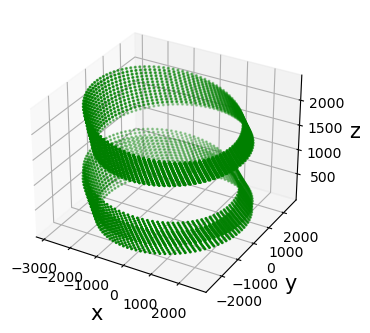

649.736940329171


In [16]:
sigma = 0.00489 # size of pixel [mm] (nikon D800)
focal = 8 # length of focal [mm] (NIKKOR 8-15mm f/3.5-4.5E)

A = np.array([ \
    [focal/sigma, 0, 0],\
    [0, focal/sigma, 0],\
    [0, 0, 1]\
])
simulator_params = {\
    "A": A, \
    "n_spot": 7, \
    "n_ring": 100, \
    "base_motion": range(0, 4000, 10), \
    "cylinder_radius": 2500, \
    "spotlaser_offset": [50, 50, 1000], \
    "ringlaser_offset": [0, 0, 1500], \
    "is_ring_with_camera": True, \
    "camera_loop": range(6), \
    "spot_loop": range(250, 300, 5), \
    "round_threshold": 0.5, \
    "is_bundle": True, \
    "is_5points_true": False, \
    "is_scale_true": True, \
}

loop_size = [5]
spot_offset_z = [200]

for z in spot_offset_z:    
    for s in loop_size:
        name = "offset_" +  str(z) + "_loop_size_" + str(s) + ".png" 
        print("offset", z, "loop_size", s)
        simulator_params["spotlaser_offset"][2] = z 
        simulator_params["camera_loop"]= range(s)
        simulator_params["spot_loop"]= range(250, 300, s-1) 
        S = Simulator()
        S.set_params(**simulator_params)
        S.run()
        S.show_result(name)
        S.calc_error()
        print(S.error)